# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [4]:
df_raw.count().sum()

1595

Answer: There are 1595 observations in our data set

#### Question 2. Create a summary table

In [47]:
summary_stats_admissions = df_raw.describe()
summary_stats_admissions

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [154]:
# Compute quantiles of gre
gre_quantiles = pd.qcut(df_raw['gre'], 4)
gre_quantiles.value_counts().sort_index()

[220, 520]    122
(520, 580]     79
(580, 660]     98
(660, 800]     99
Name: gre, dtype: int64

In [155]:
# Compute quantiles of gpa
gpa_quantiles = pd.qcut(df_raw['gpa'], 4)
gpa_quantiles.value_counts().sort_index()

[2.26, 3.13]     103
(3.13, 3.395]     96
(3.395, 3.67]    102
(3.67, 4]         97
Name: gpa, dtype: int64

In [156]:
# What is the sample size distribution among quantiles of gre and gpa by prestige level?
df_raw.pivot_table(['gre'], ['admit', gre_quantiles], [gpa_quantiles, 'prestige'], aggfunc=[len])

len                                                  \
                          gre                                                   
gpa              [2.26, 3.13]                   (3.13, 3.395]                   
prestige                  1.0   2.0   3.0   4.0           1.0  2.0   3.0  4.0   
admit gre                                                                       
0     [220, 520]          5.0  12.0  18.0  12.0           3.0  6.0  11.0  5.0   
      (520, 580]          2.0   9.0   3.0   1.0           4.0  4.0   5.0  5.0   
      (580, 660]          NaN   5.0   2.0   3.0           3.0  6.0   5.0  3.0   
      (660, 800]          NaN   6.0   NaN   2.0           3.0  4.0   2.0  4.0   
1     [220, 520]          2.0   5.0   1.0   NaN           NaN  3.0   1.0  1.0   
      (520, 580]          1.0   NaN   2.0   1.0           2.0  2.0   1.0  NaN   
      (580, 660]          NaN   2.0   1.0   NaN           1.0  5.0   2.0  1.0   
      (660, 800]          2.0   3.0   1.0   1.0           1.0  3.0   NaN  NaN   

                                                                         
                                                                         
gpa              (3.395, 3.67]                (3.67, 4]                  
prestige                   1.0  2.0  3.0  4.0       1.0  2.0   3.0  4.0  
admit gre                                                                
0     [220, 520]           NaN  8.0  5.0  3.0       NaN  1.0   2.0  3.0  
      (520, 580]           NaN  6.0  5.0  4.0       2.0  3.0   3.0  2.0  
      (580, 660]           NaN  9.0  7.0  2.0       1.0  4.0   9.0  1.0  
      (660, 800]           1.0  4.0  6.0  2.0       4.0  8.0  10.0  3.0  
1     [220, 520]           2.0  1.0  3.0  1.0       2.0  2.0   2.0  2.0  
      (520, 580]           2.0  4.0  NaN  1.0       1.0  3.0   1.0  NaN  
      (580, 660]           4.0  5.0  4.0  NaN       3.0  6.0   2.0  1.0  
      (660, 800]           4.0  5.0  1.0  3.0       6.0  4.0   6.0  NaN

In [157]:
# What is the standard deviation distribution among quantiles of gre and gpa by prestige level?
df_raw.pivot_table(['gre'], ['admit', gre_quantiles], [gpa_quantiles, 'prestige'], aggfunc=[np.std])

std                                                 \
                          gre                                                  
gpa              [2.26, 3.13]                                  (3.13, 3.395]   
prestige                  1.0        2.0        3.0        4.0           1.0   
admit gre                                                                      
0     [220, 520]    53.665631  47.097578  87.372690  67.149765     80.000000   
      (520, 580]     0.000000  15.634719  11.547005        NaN     19.148542   
      (580, 660]          NaN  14.142136  14.142136  11.547005     30.550505   
      (660, 800]          NaN  54.772256        NaN  14.142136     20.000000   
1     [220, 520]     0.000000  92.736185        NaN        NaN           NaN   
      (520, 580]          NaN        NaN  14.142136        NaN     14.142136   
      (580, 660]          NaN  28.284271        NaN        NaN           NaN   
      (660, 800]    56.568542  30.550505        NaN        NaN           NaN   

                                                                            \
                                                                             
gpa                                               (3.395, 3.67]              
prestige                2.0        3.0        4.0           1.0        2.0   
admit gre                                                                    
0     [220, 520]  43.204938  70.478881  46.043458           NaN  33.806170   
      (520, 580]  20.000000  10.954451  14.142136           NaN  19.663842   
      (580, 660]  24.221203  22.803509  30.550505           NaN  22.607767   
      (660, 800]  10.000000  28.284271  48.989795           NaN  50.000000   
1     [220, 520]  61.101009        NaN        NaN     14.142136        NaN   
      (520, 580]   0.000000        NaN        NaN     28.284271  16.329932   
      (580, 660]  21.908902  14.142136        NaN     19.148542  30.331502   
      (660, 800]  52.915026        NaN        NaN     52.599113  49.799598   

                                                                         \
                                                                          
gpa                                     (3.67, 4]                         
prestige                3.0        4.0        1.0        2.0        3.0   
admit gre                                                                 
0     [220, 520]  57.619441  61.101009        NaN        NaN  28.284271   
      (520, 580]  10.954451  19.148542   0.000000  11.547005  20.000000   
      (580, 660]  23.094011  14.142136        NaN  16.329932  17.638342   
      (660, 800]  56.213877  14.142136  64.031242  54.248107  31.902630   
1     [220, 520]  23.094011        NaN   0.000000   0.000000  42.426407   
      (520, 580]        NaN        NaN        NaN   0.000000        NaN   
      (580, 660]  30.000000        NaN  11.547005  16.329932   0.000000   
      (660, 800]        NaN  40.000000  48.989795  52.915026  56.095157   

                             
                             
gpa                          
prestige                4.0  
admit gre                    
0     [220, 520]  46.188022  
      (520, 580]  28.284271  
      (580, 660]        NaN  
      (660, 800]  30.550505  
1     [220, 520]  28.284271  
      (520, 580]        NaN  
      (580, 660]        NaN  
      (660, 800]        NaN

#### Question 3. Why would GRE have a larger STD than GPA?

In [9]:
# Inspect gre, gpa std
df_raw.std()[['gre', 'gpa']]

gre    115.628513
gpa      0.380630
dtype: float64

Answer: Because the GRE consists of three parts: quantitative reasoning, verbal reasoning, and analytical writing
and because test takers each have different academic degrees, there is going to be larger variation across testing
for knowledge in these areas. Specifically, I would expect skills in quantitative & verbal reasoning, and analytical writing to vary by academic institution, academic college, academic department, academic degree program, and degree program specialization. This is because most academic institutions, including their colleges, departments, and degree programs tend to put varied emphasis on having different quantitative, verbal, and writing skills. 

e.g., Theatre arts majors, might not need to have a strong background in quantitative reasoning, so they may not have to take classes focusing on quantitative reasoning (unless they went to strong engineering college). Similary, a computer engineering major may not need to have a strong background in English literature, so the emphasis is not on building analytical writing skills (unless they went to a strong liberal arts college). Therefore, I would expect more variation in GRE scores due to the many different degree programs having a different focus on acquiring different skills, and in varying amounts.

#### Question 4. Drop data points with missing data


In [10]:
# Which columns have missing data?
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [11]:
# Which records are null?
df_raw[df_raw.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [12]:
# What is shape of dataframe before dropping records?
shape_before_dropna = df_raw.shape
print(shape_before_dropna)

(400, 4)


In [13]:
# Inspect shape before dropping missing values
shape_after_dropna = df_raw.dropna(how='any').shape
print(shape_after_dropna)

(397, 4)


In [14]:
# Now, drop missing values
df_raw.dropna(how='any', inplace=True)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Before dropping missing values the dataframe shape was (400, 4). After dropping missing values the dataframe
shape was (397, 3). The `isnull()` method showed that there were three records having any values missing in a row (axis=1).

#### Question 6. Create box plots for GRE and GPA

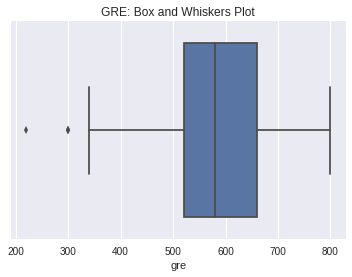

In [178]:
#boxplot 1
#df_raw.boxplot('gre')
sns.boxplot('gre', data=df_raw)
sns.plt.title('GRE: Box and Whiskers Plot')

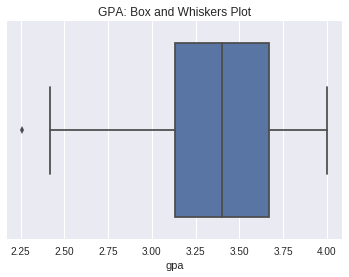

In [179]:
#boxplot 2 
#df_raw.boxplot('gpa')
sns.boxplot('gpa', data=df_raw)
sns.plt.title('GPA: Box and Whiskers Plot')

#### Question 7. What do these plots show?

Answer: They show the data's spread, or how far from the center the data tend to range. Specifically, boxplots show the middle fifty percent of the data, and its range.

The idea is to divide the data into four equal groups and see how far apart the extreme groups are.The data is first divided into two equal high and low groups at the median, which is called the second quartile, or Q2.
The median of the low group is called the first quartile or Q1. The median of the high group is the third quartile, or Q3. The box's ends are the quartiles Q1 and Q3 respectively. The box's midline is the quartile Q2, which is the median of the data. The interquartile range (IQR) is the distance between the box's ends: the distance between the third quartile and the first quartile, or Q3-Q1. These plots are especially good for showing off differences between  the high and low groups, as well as outliers.

#### Question 8. Describe each distribution 

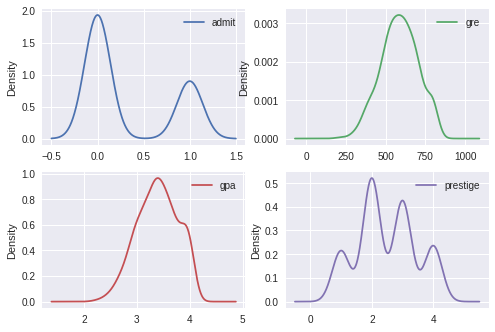

In [20]:
# plot the distribution of each variable 
df_raw.plot(kind='density', subplots=True, layout=(2, 2), sharex=False)
plt.show()

The *Admit distribtion* is bimodal (has two modes, 0, and 1) as expected. Both the *GRE distribution* and *GPA distribution* are approximately symmetrical. The *Prestige distribution* is multimodal (has four modes, 1, 2, 3, 4) as expected.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [121]:
# Test for normality using the Kolmogorov-Smirnov Test

# GRE normal?
print('GRE:      ', stats.kstest(df_raw.gre, 'norm'))
print('Kurtosis: ', df_raw.gre.kurt())
print('Skew:     ', df_raw.gre.skew())

print('~~~~~~~~~~~')

# GPA normal?
print('GPA      : ', stats.kstest(df_raw.gpa, 'norm'))
print('Kurtosis: ', df_raw.gpa.kurt())
print('Skew:     ', df_raw.gpa.skew())

print('~~~~~~~~~~~')

# Admit normal?
print('Admit:    ', stats.kstest(df_raw.admit, 'norm'))
print('Kurtosis: ', df_raw.admit.kurt())
print('Skew:     ', df_raw.admit.skew())

print('~~~~~~~~~~~')

# Prestige normal?
print('Prestige: ', stats.kstest(df_raw.prestige, 'norm'))
print('Kurtosis: ', df_raw.prestige.kurt())
print('Skew:     ', df_raw.prestige.skew())

('GRE:      ', KstestResult(statistic=1.0, pvalue=0.0))
('Kurtosis: ', -0.33286435465143427)
('Skew:     ', -0.146046988215597)
~~~~~~~~~~~
('GPA      : ', KstestResult(statistic=0.98972085476178895, pvalue=0.0))
('Kurtosis: ', -0.56356989952216807)
('Skew:     ', -0.21688893296924305)
~~~~~~~~~~~
('Admit:    ', KstestResult(statistic=0.5, pvalue=0.0))
('Kurtosis: ', -1.3865881769308692)
('Skew:     ', 0.7876691478505351)
~~~~~~~~~~~
('Prestige: ', KstestResult(statistic=0.84134474606854293, pvalue=0.0))
('Kurtosis: ', -0.90103795489017591)
('Skew:     ', 0.086505552897055041)


Answer: No. We would not meet that requirement. Because according to the **Kolmogorov-Smirnov test**, there is zero percent chance that the test statistic values of `D` we observed for GRE, GPA, Admit, and Prestige respectively `(1.0, 0.9897, 0.5, and 0.8413`) could have arisen if the data had been drawn from a normal distribution. We therefore reject the hypothesis at the 95% confidence level that the data were drawn from a normal distribution and conclude that the data is not normally distributed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, it needs correction. It needs correction because the distributions are not normal. They are both left-skewed and leptokurtic. I plan to remove outliers and log transform the data.

In [49]:
# GRE IQR
q3_gre = summary_stats_admissions.gre['75%']
q1_gre = summary_stats_admissions.gre['25%']
iqr_gre = q3_gre - q1_gre
low_fence_gre = q1_gre - 1.5*iqr_gre
high_fence_gre = q3_gre + 1.5*iqr_gre
print("GRE IQR: ", iqr_gre)
print("GRE low fence: ", low_fence_gre)
print("GRE high fence: ", high_fence_gre)

('GRE IQR: ', 140.0)
('GRE low fence: ', 310.0)
('GRE high fence: ', 870.0)


In [126]:
# Find GRE outliers
print('Number of outliers: ', df_raw[(df_raw.gre < low_fence_gre) | (df_raw.gre > high_fence_gre)].shape[0])
print('These are the outliers: ')
df_raw[(df_raw.gre < low_fence_gre) | (df_raw.gre > high_fence_gre)]

('Number of outliers: ', 4)
These are the outliers: 


,admit,gre,gpa,prestige
71,0,300.0,2.92,4.0
179,0,300.0,3.01,3.0
304,0,220.0,2.83,3.0
315,1,300.0,2.84,2.0


In [127]:
# Remove GRE outliers
print('Shape before outlier removal is: ', df_raw.shape)
df = df_raw[(df_raw.gre >= low_fence_gre) & (df_raw.gre <= high_fence_gre)]
print('Shape after outlier removal is: ', df.shape)

('Shape before outlier removal is: ', (397, 4))
('Shape after outlier removal is: ', (393, 4))


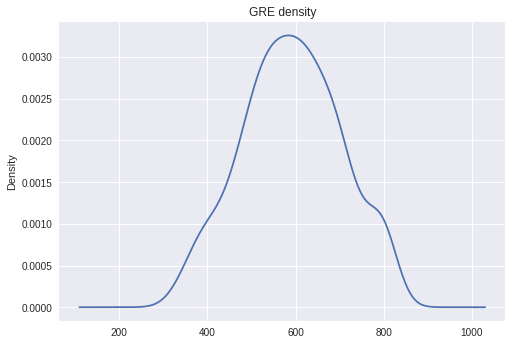

In [140]:
# Plot to visually inspect distribution, still looks skewed
df.gre.plot.density()
plt.title('GRE density')
plt.show()

In [50]:
# GPA IQR
q3_gpa = summary_stats_admissions.gpa['75%']
q1_gpa = summary_stats_admissions.gpa['25%']
iqr_gpa = q3_gpa - q1_gpa
low_fence_gpa = q1_gpa - 1.5*iqr_gpa
high_fence_gpa = q3_gpa + 1.5*iqr_gpa
print("GPA IQR: ", round(iqr_gpa, 1))
print("GPA low fence: ", round(low_fence_gpa, 1))
print("GPA high fence: ", round(high_fence_gpa, 1))

('GPA IQR: ', 0.5)
('GPA low fence: ', 2.3)
('GPA high fence: ', 4.5)


In [129]:
# Now, find GPA Outliers
print('Number of outliers: ', df[(df.gpa < low_fence_gpa) | (df.gpa > high_fence_gpa)].shape[0])
print('These are the outliers: ')
df[(df.gpa < low_fence_gpa) | (df.gpa > high_fence_gpa)]

('Number of outliers: ', 1)
These are the outliers: 


,admit,gre,gpa,prestige
289,0,420.0,2.26,4.0


In [130]:
print('Shape before outlier removal is: ', df.shape)
df = df[(df.gpa >= low_fence_gpa) & (df.gpa <= high_fence_gpa)]
print('Shape after outlier removal is: ', df.shape)

('Shape before outlier removal is: ', (393, 4))
('Shape after outlier removal is: ', (392, 4))


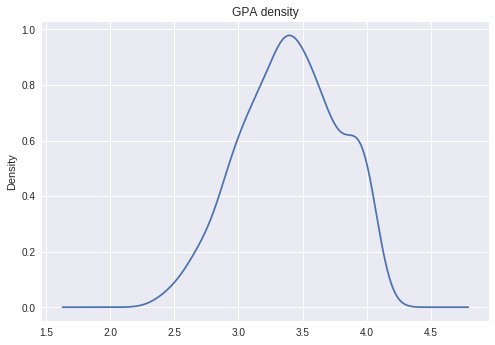

In [142]:
# Plot to visually inspect distribution, still looks skewed!
df.gpa.plot.density()
plt.title('GPA density')
plt.show()

In [186]:
# Removed outliers: re-test for normality using the Kolmogorov-Smirnov Test

# Observation: skew got better, kurtosis got worse!

# GRE
print('GRE:      ', stats.kstest(df.gre, 'norm'))
print('Kurtosis: ', df.gre.kurt())
print('Skew:     ', df.gre.skew())

print('~~~~~~~~~~~')

# GPA
print('GPA      : ', stats.kstest(df.gpa, 'norm'))
print('Kurtosis: ', df.gpa.kurt())
print('Skew:     ', df.gpa.skew())

('GRE:      ', KstestResult(statistic=1.0, pvalue=0.0))
('Kurtosis: ', -0.55667361627723366)
('Skew:     ', -0.028408720277087456)
~~~~~~~~~~~
('GPA      : ', KstestResult(statistic=0.99223974644944635, pvalue=0.0))
('Kurtosis: ', -0.62390073209492058)
('Skew:     ', -0.19724629618780309)


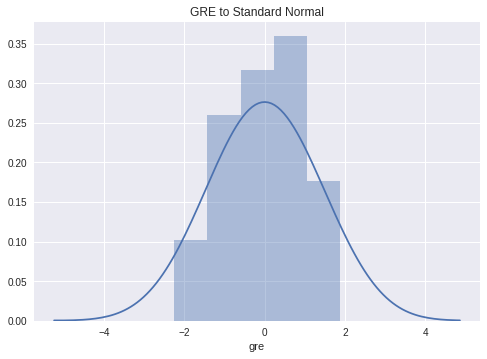

In [168]:
# Transform GRE distribution to standard normal 
sns.distplot( (df.gre - df.gre.mean()) / df.gre.std(), bins=5, kde_kws={'bw':1} )
sns.plt.title('GRE to Standard Normal')
sns.plt.show()

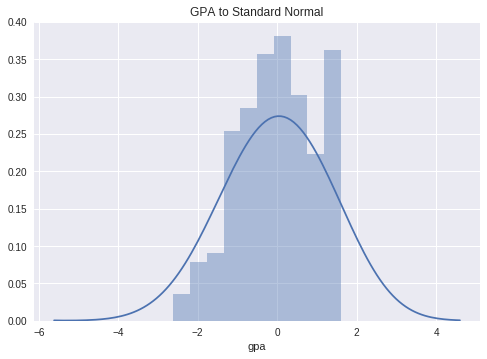

In [170]:
# Transform GPA distribution to standard normal 
sns.distplot( (df.gpa - df.gpa.mean()) / df.gpa.std(), bins=10, kde_kws={'bw':1} )
sns.plt.title('GPA to Standard Normal')
sns.plt.show()

In [185]:
# Log transform the data: re-test for normality using the Kolmogorov-Smirnov Test

# Observation: Skew got worse, Kurtosis got better

# GRE
print('GRE:      ', stats.kstest(np.log(df.gre), 'norm'))
print('Kurtosis: ', np.log(df.gre).kurt())
print('Skew:     ', np.log(df.gre).skew())

print('~~~~~~~~~~~')

# GPA
print('GPA      : ', stats.kstest(np.log(df.gpa), 'norm'))
print('Kurtosis: ', np.log(df.gpa).kurt())
print('Skew:     ', np.log(df.gpa).skew())

('GRE:      ', KstestResult(statistic=0.99999999721106625, pvalue=0.0))
('Kurtosis: ', -0.18677728430420748)
('Skew:     ', -0.47287836787183568)
~~~~~~~~~~~
('GPA      : ', KstestResult(statistic=0.81696385197730359, pvalue=0.0))
('Kurtosis: ', -0.31189663172165183)
('Skew:     ', -0.43724961849141997)


Answer: I don't know how to correct for the skewness and kurotis inherent in this data set.

But here's what I found: 

1. After removing outliers, the skew got better, but the kurtosis got worse!
2. After removing outliers and log transforming the data, the skew got worse, but the kurtosis got better!
3. One way to normalize the data is to subtract the mean, and divide by the standard deviation. This puts the data on the standard normal scale.

#### Question 11. Which of our variables are potentially colinear? 

Answer: GPA and GRE are potentially collinear. i.e., They are moderately positively correlated.

In [28]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


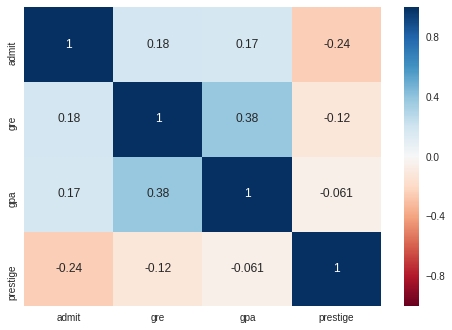

In [29]:
sns.heatmap(df_raw.corr(), annot=True, cmap='RdBu')

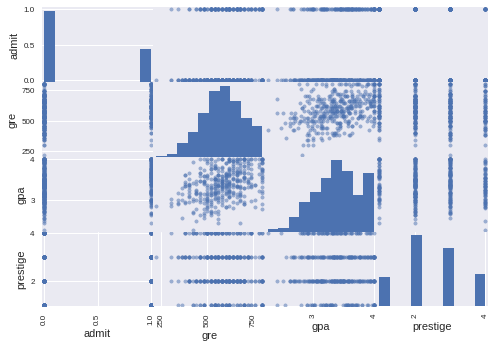

In [30]:
pd.scatter_matrix(df_raw)
plt.show()

#### Question 12. What did you find?

Answer: GPA and GRE are potentially collinear. i.e., They are moderately positively correlated.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: First, inspect the spread of the data both graphically and in tabular form. Look at the counts in each of the factor-level combinations to see how each is represented. Generate summary statistics on each predictor to quality check the count, variance, std, quartiles, and number of Null values. Identify null values if any and remove them or impute values. Create both boxplots, histograms, and density plots to inspect the shape of the distributions. Check for outliers. Identify which data instances are outliers and remove them. Check the data distributions for normality by computing the kstest. At the same time evalute distribution skew, and kurtosis. If necessary, log transform the data to to help transform a non-normally distributed data distribution to a normal one (This won't always work, but its worth trying!). Finally, last but not least, rescale your data if necessary to the standard normal and then graph it to observe how your data fits the standard normal distribution.

#### Question 14. What is your hypothesis? 

Answer: We hypothesize that GRE, GPA, and prestige may be used to predict if a student will be admitted to graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

#### Performance Evaluation
> Mark boxes with an 'X'

| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Read in your dataset, determine how many samples are present, and ID any missing data | | |X | |
| Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation) | | | |X|
| Describe the distributions of your data | | | |X|
| Plot box plots for each variable | | |X| |
| Create a covariance matrix | | |X| |
| Determine any issues or limitations, based on your exploratory analysis | | |X| |
| Outline exploratory analysis methods | | | |X| |

Notes:
- "Samples" means rows of data, not individual cells
- Great summary tables. Make sure you can explain them, this quickly becomes a lot of data in itself!
- Excellent analysis of the distributions! You show a strong grasp of statistical terms and concepts, and a propensity to rely on tests rather than "eyeballing" it - which would often lead you astray. Great work!
- I'd like to see more explanation of your box plots. You define them generically, but what about for our dataset. 
- Your covariance matrix is well done. It can be good to include an explanation of your cutoff point for deciding if things are colinear or not. 
- You do a good job of attempting to correct for outliers and awkward distributions. One thing to include might be an explanation of what this is doing to your model. You can't always correct data, but you can note the caveats it brings with it. 
- Solid and clear exploratory analysis plan. 

Overall, excellent work. I'm very impressed with your knowledge of statistics and your application in this context. Remember to keep your graphs organized and concise - don't include more than you need or the audience can get overwhelmed. Also always include an explanation with your visuals. Excellent job, you're very much on the right track. 

---

## Score:
Based on the requirements, you can earn a maximum of  **21**  points on this project. 

#### Your total score is: **16**